In [46]:
# Python
import pandas as pd
from fbprophet import Prophet

In [47]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [68]:
df.shape

(293, 2)

In [69]:
m = Prophet()
model = m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
print(model.__doc__)

Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear' or 'logistic' to specify a linear or logistic
        trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoints` is not supplied,
        then n_changepoints potential changepoints are selected uniformly from
        the first `changepoint_range` proportion of the history.
    changepoint_range: Proportion of history in which trend changepoints will
        be estimated. Defaults to 0.8 for the first 80%. Not used if
        `changepoints` is specified.
    yearly_seasonality: Fit yearly seasonality.
        Can be 'auto', True, False, or a number of Fourier terms to generate.
    weekly_seasonality: Fit weekly seasonality.
        Can be 'auto', True, False, or a number of 

In [71]:
future = m.make_future_dataframe(periods=6)
future.tail()

,ds
294,2016-05-03
295,2016-05-04
296,2016-05-05
297,2016-05-06
298,2016-05-07


In [72]:
future.shape, df.shape

((299, 1), (293, 2))

In [73]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-05-03,476373.631045,465643.683745,486493.373843
295,2016-05-04,477385.656545,466916.789930,488268.540870
296,2016-05-05,478629.440863,468384.303021,489481.791411
297,2016-05-06,480068.290308,470081.176962,491025.011656
298,2016-05-07,481658.052770,471070.273193,491599.308877


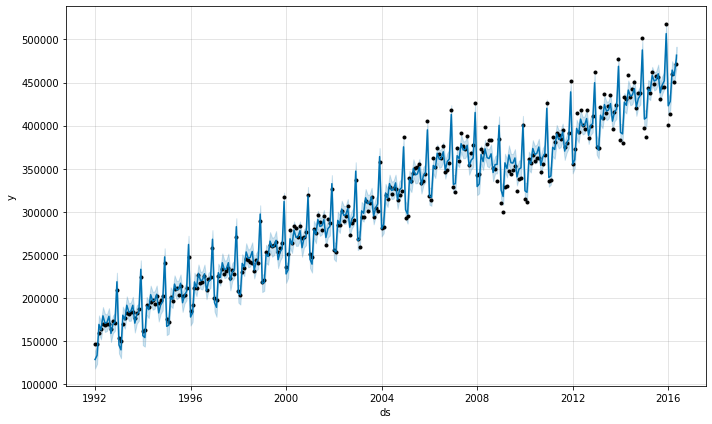

In [74]:
fig1 = m.plot(forecast)

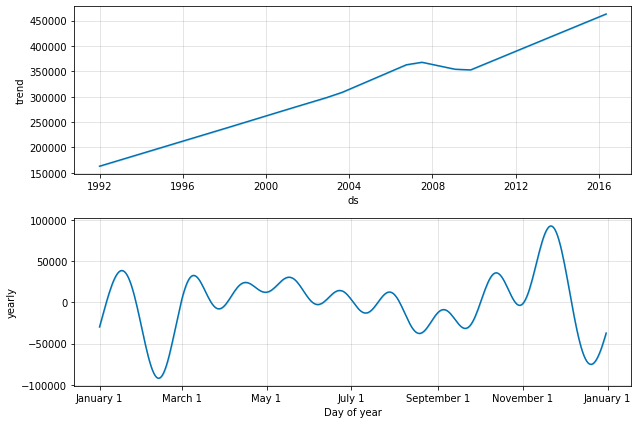

In [75]:
fig2 = m.plot_components(forecast)

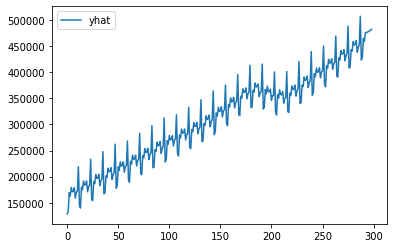

In [77]:
df1 = forecast[[ 'yhat']]
df1.plot()

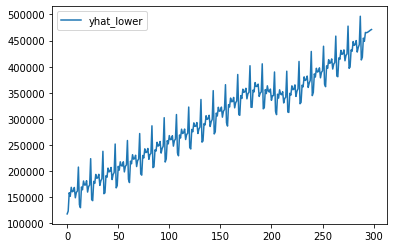

In [78]:
df1 = forecast[[ 'yhat_lower']]
df1.plot()

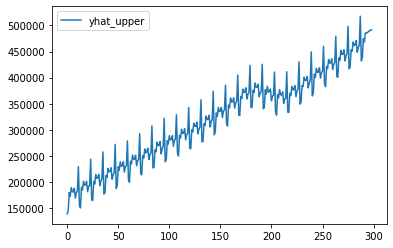

In [79]:
df1 = forecast[[ 'yhat_upper']]
df1.plot()

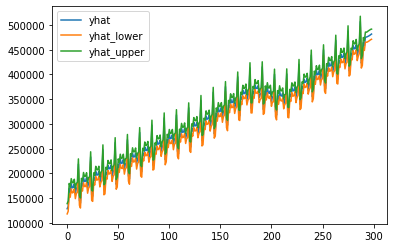

In [80]:
df1 = forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']]
df1.plot()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



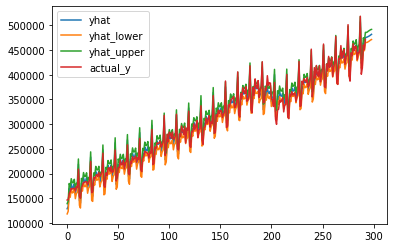

In [81]:
df1 = forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']]
df1.loc[:,'actual_y'] = df.y
df1.plot()

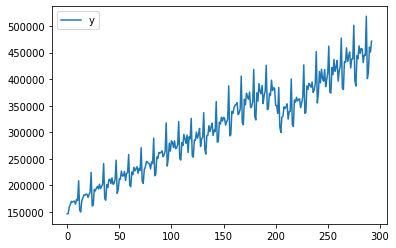

In [82]:
df.plot()

In [67]:
df = pd.read_csv('example_retail_sales.csv')
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068
